In [1]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([(1, 1), (2, 4), (3, 1), (9, 3)])
# get x and y vectors
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from tqdm import tqdm
from matplotlib.colors import LogNorm
from scipy import stats
from pylab import *
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, ConstantModel
from scipy.stats import norm

df = pd.read_csv("data/run0115_git_det37_tier3_table.txt", sep=" ", header=0)
df.head()
l = len(df)
energy = df[df.columns[0]]
AoE = df[df.columns[1]]

<ipython-input-12-c4349fd8ed28>:13: RuntimeWarning: overflow encountered in exp
  return c * (np.exp(e*(x-l)+d)) / (np.exp((x-l)/t)+1)
<ipython-input-12-c4349fd8ed28>:35: RuntimeWarning: invalid value encountered in sqrt
  sigma2=sqrt(diag(cov2))
<ipython-input-12-c4349fd8ed28>:35: RuntimeWarning: invalid value encountered in sqrt
  sigma2=sqrt(diag(cov2))
<ipython-input-12-c4349fd8ed28>:13: RuntimeWarning: overflow encountered in exp
  return c * (np.exp(e*(x-l)+d)) / (np.exp((x-l)/t)+1)
<ipython-input-12-c4349fd8ed28>:35: RuntimeWarning: invalid value encountered in sqrt
  sigma2=sqrt(diag(cov2))
<ipython-input-12-c4349fd8ed28>:35: RuntimeWarning: invalid value encountered in sqrt
  sigma2=sqrt(diag(cov2))
<ipython-input-12-c4349fd8ed28>:35: RuntimeWarning: invalid value encountered in sqrt
  sigma2=sqrt(diag(cov2))
<ipython-input-12-c4349fd8ed28>:35: RuntimeWarning: invalid value encountered in sqrt
  sigma2=sqrt(diag(cov2))
<ipython-input-12-c4349fd8ed28>:35: RuntimeWarning: invali

Text(0.5, 0.98, 'Inverted Coax det=37, run-0115')

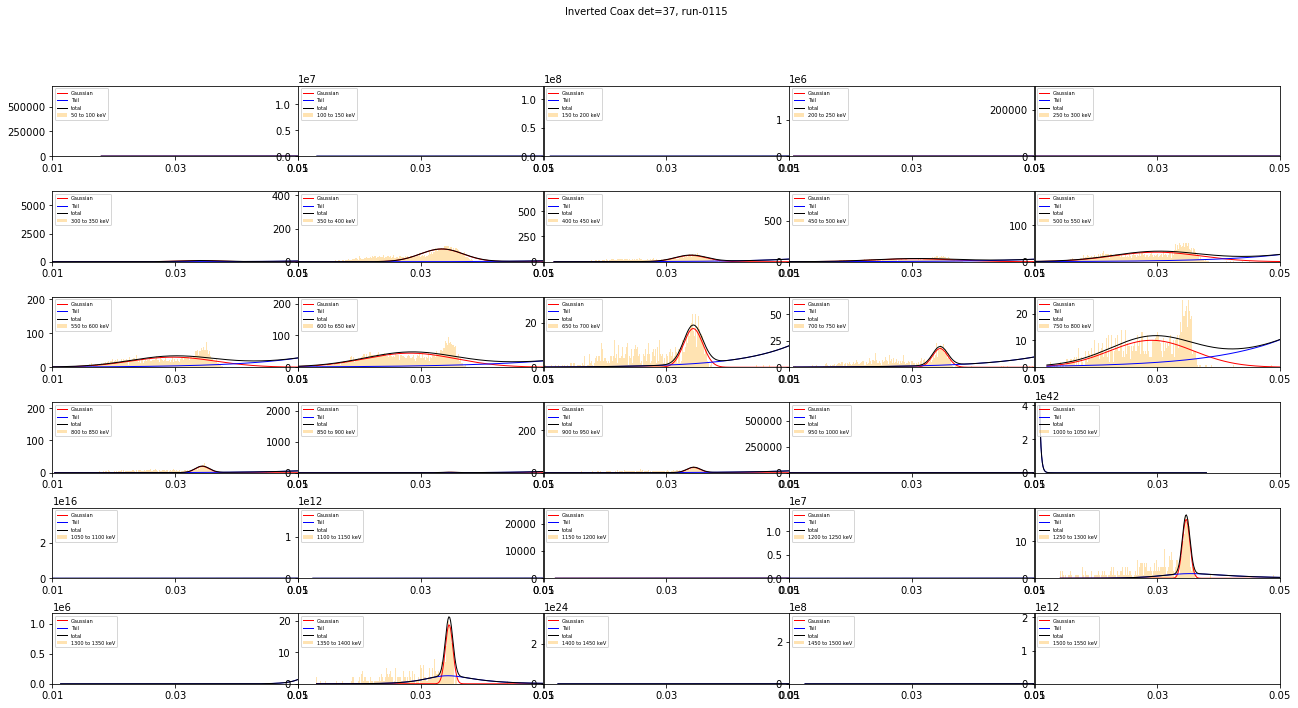

In [12]:
from pylab import *
from scipy.optimize import curve_fit

#A , B = 1350, 1400 
A , B = 50, 100 

n = 500  #bins

def gauss(x,mu,sigma,A):
    return A/(np.sqrt(2*np.pi))/sigma*(np.exp(-0.5*((x-mu)/sigma)**2))

def tail(x, c, e, l, d, t):
    return c * (np.exp(e*(x-l)+d)) / (np.exp((x-l)/t)+1)

fig, axs = plt.subplots(6,5, figsize=(22,11), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for j in range(30):
    A1s= []
    for i in range(len(energy)):
        if energy[i] > A and energy[i]< B:
            A1s.append(AoE[i])
    xdata = np.asarray(A1s)
    y,x,_=axs[j].hist(xdata,n,alpha=.3,color='orange', label='%.f to %.f keV' %(A, B))
    x = (x[1:]+x[:-1])/2        # for len(x)==len(y)

    expected=(0.035, 0.001, 100)
    expected2=(1, 1, 0.03, 0, 0.002)                

    params,cov=curve_fit(gauss,x,y,expected)
    sigma=sqrt(diag(cov))

    params2,cov2=curve_fit(tail,x,y,expected2)
    sigma2=sqrt(diag(cov2))
    
    params2[2] = params[0]*0.97
    params2[3] = params2[3]*0.006
    params2[4] = params2[4]*1000

    total = tail(x,*params2) + gauss(x,*params)            #0.05
    axs[j].plot(x,gauss(x,*params),color='r',lw=1,label='Gaussian')
    axs[j].plot(x,tail(x,*params2),color='b',lw=1,label='Tail')
    axs[j].plot(x,total,color='k',lw=1,label='total')
    axs[j].legend(loc=2, prop={'size': 5})
    axs[j].set_xlim(0.01,0.05)
    axs[j].set_xticks([0.01,0.03,0.05])
    A = A+50
    B = B+50

fig.suptitle('Inverted Coax det=37, run-0115', fontsize=10)

#print(params,'\n',sigma)
#plt.savefig('Fitting_slices2.pdf')



ValueError: operands could not be broadcast together with shapes (201,) (200,) 

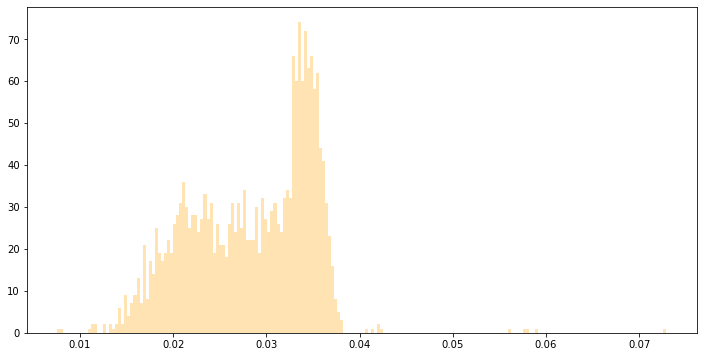

In [4]:
#cut slices
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import scipy.optimize
def gauss(x,sigma,mu, A):
    return A/(np.sqrt(2*np.pi))/sigma*(np.exp(-0.5*((x-mu)/sigma)**2))

def tail(x, c, e, l, d, t):
    return c * (np.exp(e*(x-l)+d)) / (np.exp((x-l)/t)+1)

A , B = 520, 550 
n = 200  #bins
fig = plt.figure(figsize=(12,6))
def gauss(x,sigma,mu, A):
    return A/(np.sqrt(2*np.pi))/sigma*(np.exp(-0.5*((x-mu)/sigma)**2))
A1s, peak = [], []
for i in range(len(energy)):
    if energy[i] > A and energy[i]< B:
        A1s.append(AoE[i])
xdata = np.asarray(A1s)
hist2, bins = np.histogram(xdata, bins=n)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
centroid = center[np.argmax(hist2)]

expected2=(0.7, 1, 0.03, 0, 0.002)                
params2,cov2=curve_fit(tail,x,y,expected2)
sigma2=sqrt(diag(cov2))
    
y,x,_=hist(xdata,n,alpha=.3,color='orange', label='data from %.f to %.f keV' %(A, B))
x = (x[1:]+x[:-1])/2        # for len(x)==len(y)
popt, _ = scipy.optimize.curve_fit(gauss, x,y, p0=(0.001,0.035, 1))
x2 = x[(x>centroid*0.965) & (x<centroid*1.1)]
y2 = y[(x>centroid*0.965) & (x<centroid*1.1)]
popt2, _ = scipy.optimize.curve_fit(gauss, x2,y2, p0=(0.001,0.035, 1))
plt.plot(x,y, color='orange', label="all data")
plt.plot(x, gauss(x, *popt), color="g", label="fit all data")
plt.plot(x2, gauss(x2, *popt2),  color='r', label="fit filtered data")
plt.plot(x, tail(x, *params2), color="b", label="tail")
plt.legend()
plt.show()


In [ ]:
from lmfit.models import GaussianModel, ConstantModel

fig = plt.figure(figsize=(12,6))
data_y = y
data_x = x
data_y_err = 0.0000001
# start with 1 Gaussian + Constant offset:


model = GaussianModel(prefix='p1_') + ConstantModel()

# this model will have parameters named:  
# p1_amplitude, p1_center, p1_sigma, and c.  
# here we give initial values to these parameters
params = model.make_params(p1_amplitude=10, p1_center=0.035, p1_sigma=0.005, c=100)

# optionally place bounds on parameters (probably not needed here):
params['p1_amplitude'].min = 0.
params['p1_center'].vary = False

## params['p1_center'].vary = False # fix a parameter from varying in fit

# now do the fit (including weighting residual by 1/y_err):
result = model.fit(data_y, params, x=data_x)

# print out param values, uncertainties, and fit statistics, or get best-fit
# parameters from `result.params`
print(result.fit_report())

# plot results
plt.errorbar(data_x, data_y, yerr=data_y_err, label='data')
plt.plot(data_x, result.best_fit, label='best fit')

plt.legend()
plt.show()


In [ ]:
#---------------------------------------------------

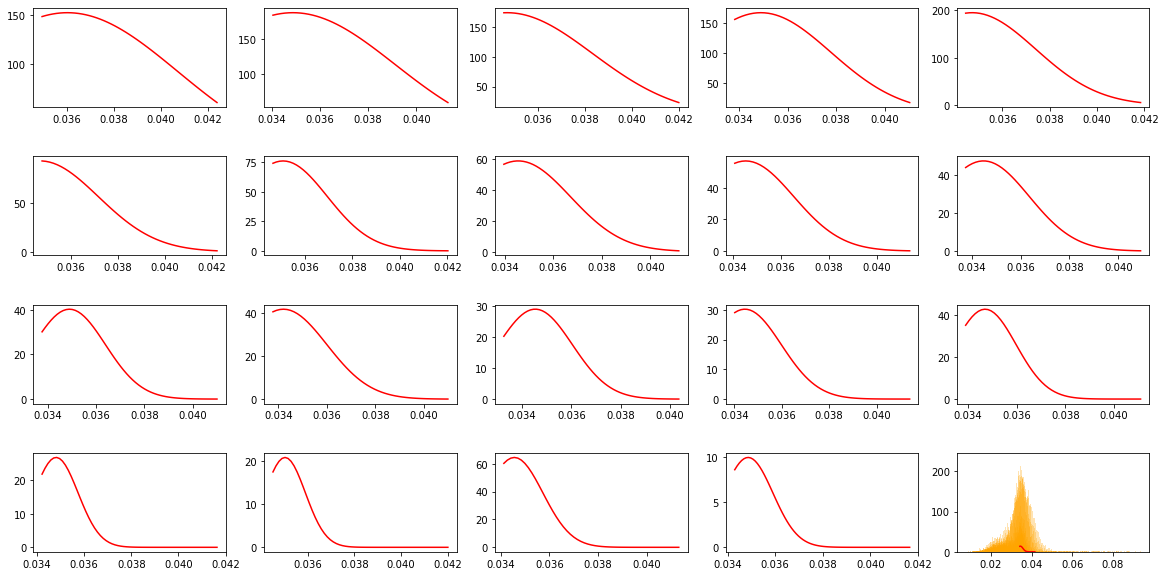

In [3]:
from pylab import *
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, ConstantModel
from lmfit import Model
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats



A , B, w = 115, 145, 30 

n = 500  #bins


def gauss(x, amp, center, sigma):
    return amp/(np.sqrt(2*np.pi))/sigma*(np.exp(-0.5*((x-center)/sigma)**2))

def tail(x, m, f, l, d, t):
    return m * (np.exp(f*(x-l)+d)) / (np.exp((x-l)/t)+1)

def fexpo(x, f, a):
    return exp(f * x + a)

df = pd.read_csv("data/run0115_git_det37_tier3_table.txt", sep=" ", header=0)
df.head()
l = len(df)
energy = df[df.columns[0]]
meanpeak = 0.03444373720763273 # 0.034723684138888884 #0.03444373720763273
AoE = df[df.columns[1]]#/meanpeak

fig, axs = plt.subplots(4,5, figsize=(20,10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace = 0.2)
axs = axs.ravel()
#--------------------------------------------------------------------------------------------- Fitting parameters
chi = []
means = []
meanstot = []
stds  =  []
stdtot = []
xticks = []
centroid_list = []
#------------------------------------------------------- data extraction
for j in range(20):
    data = []
    for i in range(len(energy)):
        if energy[i] > A and energy[i]< B:
            data.append(AoE[i])
    xdata = np.asarray(data)

    y,x,_=hist(xdata,n,alpha=.3,color='orange', label='data from %.f to %.f keV' %(A, B))
    x = (x[1:]+x[:-1])/2        # for len(x)==len(y)
    centroid = x[np.argmax(y)]        
        
    model1 = Model(gauss, prefix='g_') #+ Model(tail, prefix='t_') #+ ConstantModel()
    paramslm = model1.make_params(g_amp=len(xdata), g_center=centroid, g_sigma=centroid*0.01)

    paramslm['g_amp'].min = 0.
    paramslm['g_center'].min = centroid * 0.9
    paramslm['g_center'].max = centroid * 1.1
    #paramslm['g_center'].vary = False
    paramslm['g_sigma'].min = 0
    paramslm['g_sigma'].max = 10

    result1 = model1.fit(y[(x>centroid*0.985) & (x<centroid*1.2)], paramslm, x=x[(x>centroid*0.985) & (x<centroid*1.2)])
    #print(result1.fit_report())
##########################
    axs[j].plot(x[(x>centroid*0.985) & (x<centroid*1.2)], result1.best_fit, color='r', label='Gaussian')
    #axs[j].set_xlim(0.01,0.07)
    A = A + w
    B = B + w
    
#plt.plot(x, gauss(x, 0.59460381,0.03476957,0.00202650))

<ipython-input-1-edd0e83d2fd8>:21: RuntimeWarning: overflow encountered in exp
  return m * (np.exp(f*(x-l)+d)) / (np.exp((x-l)/t)+1)
<ipython-input-1-edd0e83d2fd8>:21: RuntimeWarning: overflow encountered in exp
  return m * (np.exp(f*(x-l)+d)) / (np.exp((x-l)/t)+1)
<ipython-input-1-edd0e83d2fd8>:21: RuntimeWarning: overflow encountered in exp
  return m * (np.exp(f*(x-l)+d)) / (np.exp((x-l)/t)+1)
<ipython-input-1-edd0e83d2fd8>:21: RuntimeWarning: overflow encountered in exp
  return m * (np.exp(f*(x-l)+d)) / (np.exp((x-l)/t)+1)
<ipython-input-1-edd0e83d2fd8>:21: RuntimeWarning: overflow encountered in exp
  return m * (np.exp(f*(x-l)+d)) / (np.exp((x-l)/t)+1)


Text(0.5, 0.98, 'Inverted Coax det=37, run-0115')

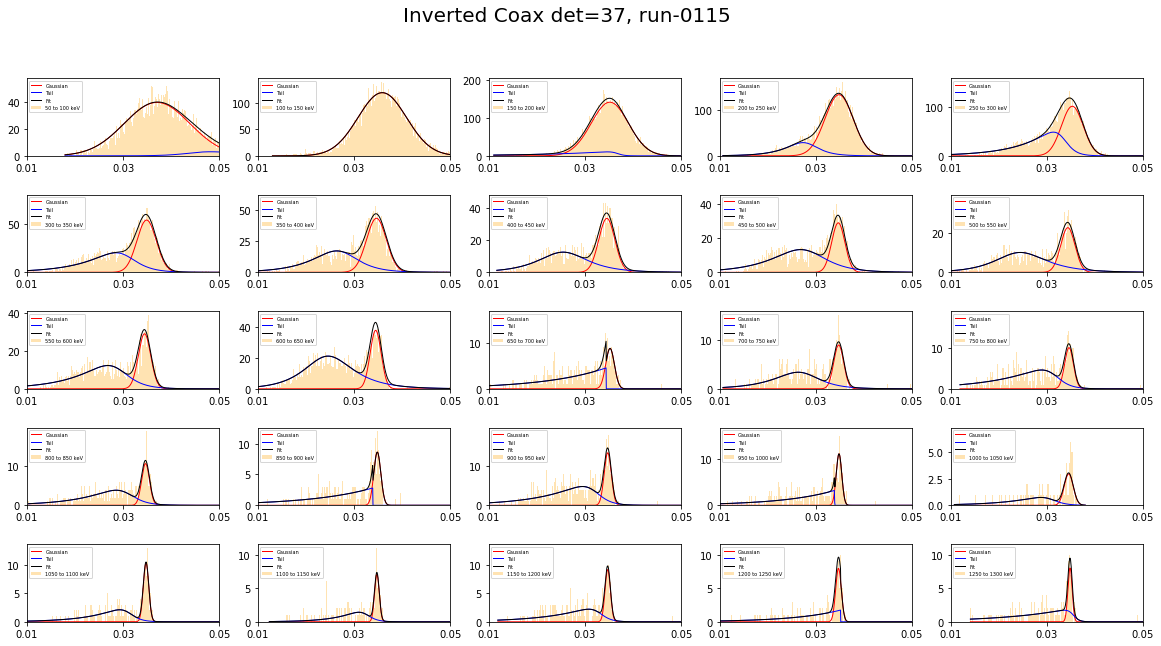

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import stats
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, ConstantModel
from lmfit import Model
#------------------------------------------------------------------------------------------------------------------
df = pd.read_csv("run0115_git_det37_tier3_table.txt", sep=" ", header=0)
df.head()
l = len(df)
energy = df[df.columns[0]]
AoE = df[df.columns[1]]
#-------------------------------------------------------
A , B = 50, 100  
n = 1000    #bins
def gauss(x, amp, center, sigma):
    return amp/(np.sqrt(2*np.pi))/sigma*(np.exp(-0.5*((x-center)/sigma)**2))
def tail(x, m, f, l, d, t):
    return m * (np.exp(f*(x-l)+d)) / (np.exp((x-l)/t)+1)
def fexpo(x, f, a):
    return exp(f * x + a)
def totalfit(x, ampl, mu, std, m, f, l, t):
    return gauss(x, ampl, mu, std) + tail(x, m, f, l, 0, t)
#-------------------------------------------------------
fig, axs = plt.subplots(5,5, figsize=(20,10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()
#-------------------------------------------------------

#------------------------------------------------------- data extraction
for j in range(25):
    data = []
    for i in range(len(energy)):
        if energy[i] > A and energy[i]< B:
            data.append(AoE[i])
    xdata = np.asarray(data)
#-------------------------------------------------------

#------------------------------------------------------- bins and centroid
    y,x,_= axs[j].hist(xdata,n,alpha=.3,color='orange', label='%.f to %.f keV' %(A, B))
    x = (x[1:]+x[:-1])/2    
    centroid = x[np.argmax(y)]
#-------------------------------------------------------

#------------------------------------------------------- Gaussian model        
    model1 = Model(gauss, prefix='g_')
    paramslm = model1.make_params(g_amp=len(xdata), g_center=centroid, g_sigma=centroid*0.01)
    paramslm['g_amp'].min = 0.
    paramslm['g_center'].min = centroid * 0.9
    paramslm['g_center'].max = centroid * 1.1
    paramslm['g_sigma'].min = 0
    paramslm['g_sigma'].max = 1
    
    result1 = model1.fit(y[(x>centroid*0.985) & (x<centroid*1.2)], paramslm, x=x[(x>centroid*0.985) & (x<centroid*1.2)])
#-------------------------------------------------------

#------------------------------------------------------- Expo
    model3 = Model(fexpo, prefix='e_') 
    paramslmex = model3.make_params(e_f=1, e_a=1)
    
    expo_min = result1.params['g_center'].value - 25*result1.params['g_sigma'].value
    expo_max = result1.params['g_center'].value - 4*result1.params['g_sigma'].value
    
    fmin = result1.params['g_center'].value - 25*result1.params['g_sigma'].value
    fmax = result1.params['g_center'].value + 10*result1.params['g_sigma'].value

    result3 = model3.fit(y[x>fmin], paramslmex, x=x[x>fmin])    
#-------------------------------------------------------

#------------------------------------------------------- The tail(from direct model)
    enteries = 0
    for i in range(len(xdata)):
        if (xdata[i] < result1.params['g_center'].value  - 3*result1.params['g_sigma'].value) & \
        (xdata[i] > result1.params['g_center'].value  - 25*result1.params['g_sigma'].value):
            enteries = enteries +1
    model2 = Model(tail, prefix='t_') 
    paramslm2 = model2.make_params(t_m= enteries * result1.params['g_center'].value, \
                              t_f= result3.params['e_f'].value, \
                              t_l= result1.params['g_center'].value - 1.5 * result1.params['g_sigma'].value, \
                              t_d= 0 ,\
                              t_t= 0.2 * result1.params['g_sigma'].value )
    #paramslm2['t_m'].min  = 0.
    #paramslm2['t_m'].max  = 10  * paramslm2['t_m']
    #paramslm2['t_f'].min  = 0.2 * result3.params['e_f'].value
    #paramslm2['t_f'].max  = 5.0 * result3.params['e_f'].value
    #paramslm2['t_l'].min  = 0.5 * paramslm2['t_l']
    #paramslm2['t_l'].max  = 2.0 * paramslm2['t_l']
    #paramslm2['t_l'].vary = False
    paramslm2['t_d'].vary = False
    #paramslm2['t_t'].min  = 0.
    #paramslm2['t_t'].max  = 2.0 * result1.params['g_sigma'].value
    
    min_tail = result1.params['g_center'].value - 25 * result1.params['g_sigma'].value
    max_tail = result1.params['g_center'].value + 10 * result1.params['g_sigma'].value
    
    result2 = model2.fit(y[(x>min_tail) & (x<max_tail)], paramslm2, x=x[(x>min_tail) & (x<max_tail)])
#-------------------------------------------------------
    
    modeltot = Model(totalfit, prefix='tot_') 
    paramstot = modeltot.make_params(tot_ampl=result1.params['g_amp'].value, \
                                     tot_mu = result1.params['g_center'].value, \
                                     tot_std = result1.params['g_sigma'].value, \
                                     tot_m = result2.params['t_m'].value, \
                                     tot_f = result2.params['t_f'].value, \
                                     tot_l = result2.params['t_l'].value, \
                                     tot_t = result2.params['t_t'].value)
    
    paramstot['tot_ampl'].min  = 0.95 * result1.params['g_amp'].value
    paramstot['tot_ampl'].max  = 1.05 * result1.params['g_amp'].value

    paramstot['tot_mu'].min  = 0.995 * result1.params['g_center'].value
    paramstot['tot_mu'].max  = 1.005 * result1.params['g_center'].value
    
    paramstot['tot_std'].min  = 0.98 * result1.params['g_sigma'].value
    paramstot['tot_std'].max  = 1.02 * result1.params['g_sigma'].value
    
    paramstot['tot_m'].min  = 0
    paramstot['tot_m'].max  = 10 * result2.params['t_m'].value
    
    paramstot['tot_f'].min  = 0.2 * result2.params['t_f'].value
    paramstot['tot_f'].max  = 5.0 * result2.params['t_f'].value
    
    paramstot['tot_l'].min  = 0.5 * result2.params['t_l'].value
    paramstot['tot_l'].max  = 2.0 * result2.params['t_l'].value
    
    paramstot['tot_t'].min  = 0
    paramstot['tot_t'].max  = 2.0 * result1.params['g_sigma'].value

    resulttot = modeltot.fit(y, paramstot, x=x)
    
    #------------------------------------------------------- Total fit
    SSE = gauss(x, resulttot.params['tot_ampl'].value, resulttot.params['tot_mu'].value, resulttot.params['tot_std'].value)
    MSE = tail(x, resulttot.params['tot_m'].value, resulttot.params['tot_f'].value, \
               resulttot.params['tot_l'].value, 0, resulttot.params['tot_t'].value)
#-------------------------------------------------------
#------------------------------------------------------- Plotting
    axs[j].plot(x, SSE, color='r', lw=1, label='Gaussian')
    axs[j].plot(x, MSE, color='b', lw=1, label='Tail')
    axs[j].plot(x, resulttot.best_fit, color='k', lw=1, label='Fit')

    #axs[j].plot(x, total, color='k', lw=1, label='Fit')
    axs[j].legend(loc=2, prop={'size': 5})
    axs[j].set_xlim(0.01,0.05)
    axs[j].set_xticks([0.01,0.03,0.05])
    A = A + 50
    B = B + 50

fig.suptitle('Inverted Coax det=37, run-0115', fontsize=20)
#plt.savefig('Fit2.pdf')

In [7]:
fmin = result1.params['g_center'].value - 25*result1.params['g_sigma'].value
fmax = result1.params['g_center'].value + 10*result1.params['g_sigma'].value

print(fmax)

0.03915698415812991


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import stats
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, ConstantModel
from lmfit import Model

A, B, w = 115, 145, 30
binw = 0.0001        #0.00045

x0, sigma = 0, 0.1

# Function to be fitted
def gauss(x, x0, y0, sigma):
    p = [x0, y0, sigma]
    return p[1]* np.exp(-((x-p[0])/p[2])**2)
df = pd.read_csv("data/run0115_git_det37_tier3_table.txt", sep=" ", header=0)
df.head()
l = len(df)
energy = df[df.columns[0]]
AoE = df[df.columns[1]]

fig, axs = plt.subplots(6,5, figsize=(20,10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace = 0.2)
axs = axs.ravel()
#--------------------------------------------------------------------------------------------- Fitting parameters
chi = []
means = []
meanstot = []
stds  =  []
stdtot = []
xticks = []
centroid_list = []
#------------------------------------------------------- data extraction
for j in range(30):
    data = []
    for i in range(len(energy)):
        if energy[i] > A and energy[i]< B:
            data.append(AoE[i])
    xdata = np.asarray(data)
    b = len(np.arange(min(xdata), max(xdata) + binw, binw))
    y,xe,_= axs[j].hist(xdata, b,alpha=.3,color='orange', label='%.f to %.f keV' %(A, B))
    x = .5 * (xe[:-1] + xe[1:])
    centroid = x[np.argmax(y)]
    
    # Initialization parameters
    p0 = [1., 1., 1.]
    # Fit the data with the function
    fit, tmp = curve_fit(gauss, x[(x>centroid*0.95) & (x<centroid*1.4)], y[(x>centroid*0.95) & (x<centroid*1.4)], p0=p0)
    #fit, tmp = curve_fit(gauss, x[(x>centroid*0.985) & (x<centroid*1.2)], y[(x>centroid*0.985) & (x<centroid*1.2)], p0=p0)

    #axs[j].set_title('Fit parameters:\n x0=%.2e y0=%.2e sigma=%.2e' % (fit[0], fit[1], fit[2]))
    #axs[j].plot(x, y, 'r--')
    #x_fine = np.linspace(xe[0], xe[-1], 10000)
    #axs[j].plot(x_fine, gauss(x_fine, fit[0], fit[1], fit[2]), 'b-')
    #axs[j].set_xlim(0.01,0.07)
    meanstot.append(fit[0])
    stdtot.append(fit[2])
    xticks.append(A)
    #plt.savefig('Gaussian_fit.png')
    #plt.show()
    A = A + w
    B = B + w

plt.close()


[-3.18954294e-07  3.48048114e-02]


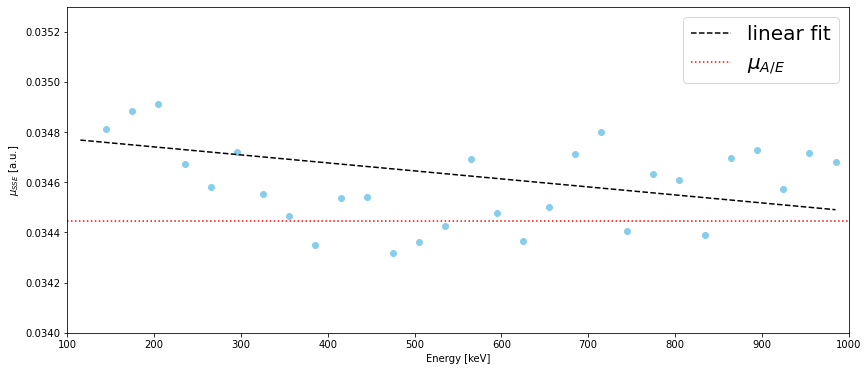

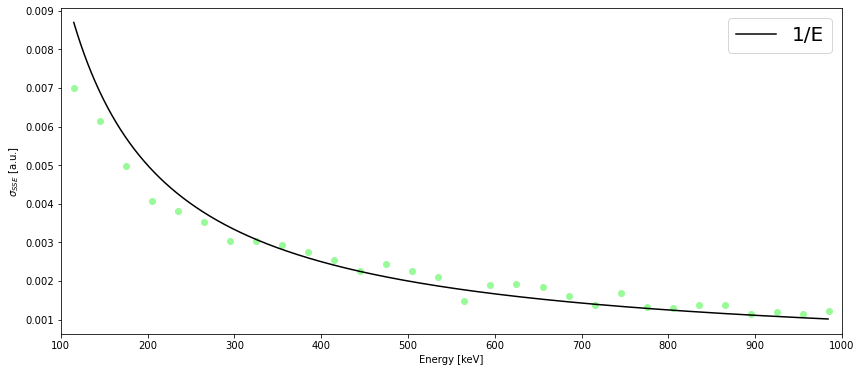

In [6]:
fig = plt.figure(figsize=(14,6))
coef = np.polyfit(xticks,meanstot,1)
poly1d_fn = np.poly1d(coef) 
plt.scatter(xticks,meanstot, marker='o',  color='skyblue' )
plt.plot(xticks, poly1d_fn(xticks), '--k', label='linear fit')
plt.ylim(0.034,0.0353)
plt.ylabel('$\u03BC_{SSE}$ [a.u.]')
plt.xlabel('Energy [keV]')
plt.xlim(100,1000)
plt.xticks(np.arange(100,1100,100))
plt.axhline(0.03444373720763273, linestyle=':', color='r', label='$\u03BC_{A/E}$')
#plt.axhline(0.04440362125000001, linestyle=':', color='r', label='$\u03BC_{A/E}$')
plt.legend(prop={'size': 20})


#plt.savefig('plots/ICmean(run113)(115)(%.2e)-(%.f).pdf'%(coef[0],w))

print(coef)
#print(binw, '-----', n)

stdtot =  [abs(ele) for ele in stdtot]

fig = plt.figure(figsize=(14,6))
plt.scatter(xticks, stdtot, marker='o', color='palegreen') 
E = np.arange(min(xticks), max(xticks), 1)
ss = 1/E
plt.plot(E,ss, color='k', label = '1/E')
plt.ylabel('$\u03C3_{SSE}$ [a.u.]')
plt.xlabel('Energy [keV]')
plt.xlim(100,1000)
plt.xticks(np.arange(100,1100,100))
plt.legend(prop={'size': 20})
#plt.savefig('plots/ICsigma(run113)(115)(%.2e)(%.f).pdf'%(coef[0],w))

#binw = 0.0001, 0.0007

In [197]:
print(np.std(meanstot))

0.0009364235245469943


In [198]:
IC = 0.0002